# Importing data

In [1]:
import pandas as pd 
data = pd.read_csv('dataset.csv')

In [2]:
data.shape

(400, 9)

In [3]:
data.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA   
0           1        337          118                  4  4.5   4.5  9.65  \
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


# Data Visualization and Analysis

In [5]:
import matplotlib.pyplot as plt

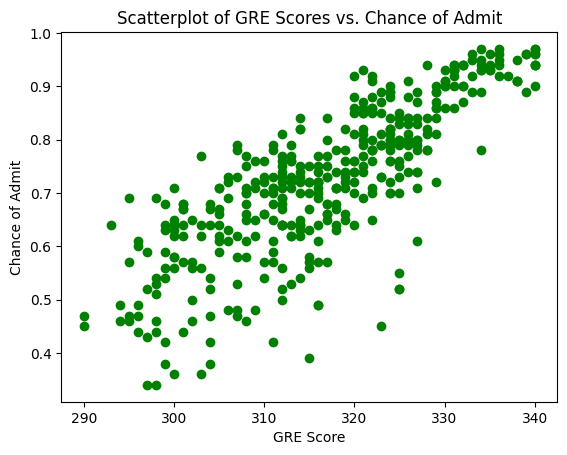

In [6]:
# Plot the scatterplot of GRE Scores vs. Chance of Admit
plt.scatter(data['GRE Score'], data['Chance of Admit '],color='g')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('Scatterplot of GRE Scores vs. Chance of Admit')
plt.show()

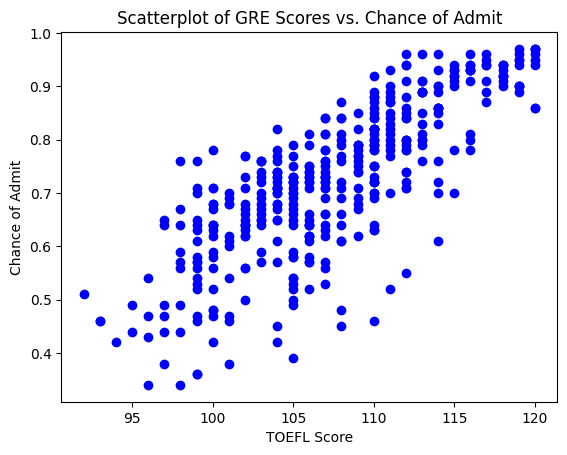

In [7]:
# Plot the scatterplot of TOEFL vs. Chance of Admit
plt.scatter(data['TOEFL Score'], data['Chance of Admit '],color='b')
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.title('Scatterplot of GRE Scores vs. Chance of Admit')
plt.show()

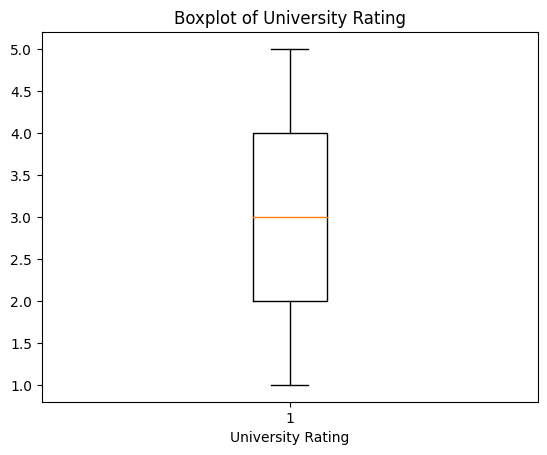

In [8]:
# Plot the boxplot of University Rating
plt.boxplot(data['University Rating'])
plt.xlabel('University Rating')
plt.title('Boxplot of University Rating')
plt.show()

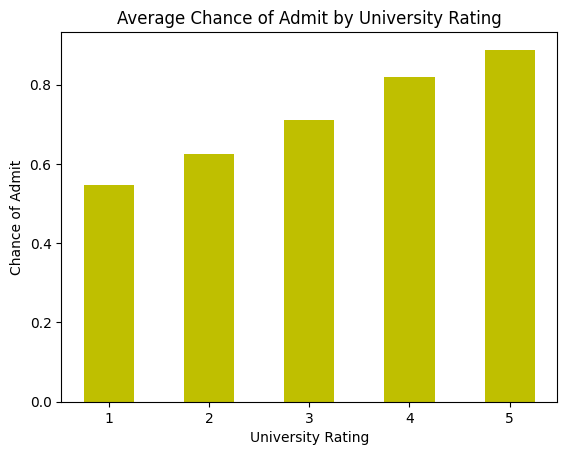

In [9]:
# Calculate the mean of Chance of Admit for each University Rating
rating_means = data.groupby('University Rating')['Chance of Admit '].mean()
fig, ax = plt.subplots()
ax.bar(rating_means.index, rating_means.values,width=0.5,color='y')
ax.set_title('Average Chance of Admit by University Rating')
ax.set_xlabel('University Rating')
ax.set_ylabel('Chance of Admit')
plt.show()

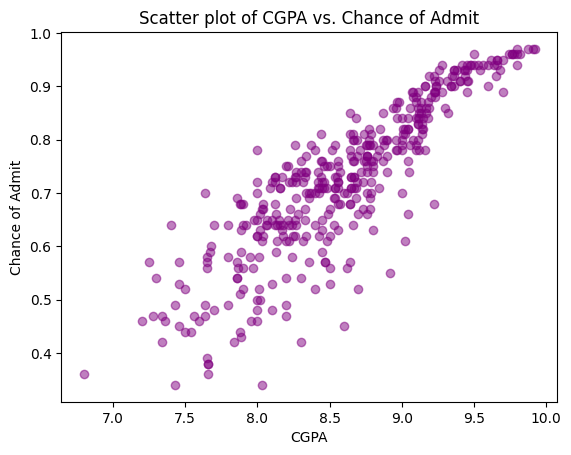

In [10]:
#Scatter plot for CGPA vs. Chance of Admit:
plt.scatter(data['CGPA'], data['Chance of Admit '], alpha=0.5, color='purple')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.title('Scatter plot of CGPA vs. Chance of Admit')
plt.show()

In [11]:
# Compute correlation
corr_matrix = data.corr()
print(corr_matrix['Chance of Admit '])

Serial No.           0.042336
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
CGPA                 0.873289
Research             0.553202
Chance of Admit      1.000000
Name: Chance of Admit , dtype: float64


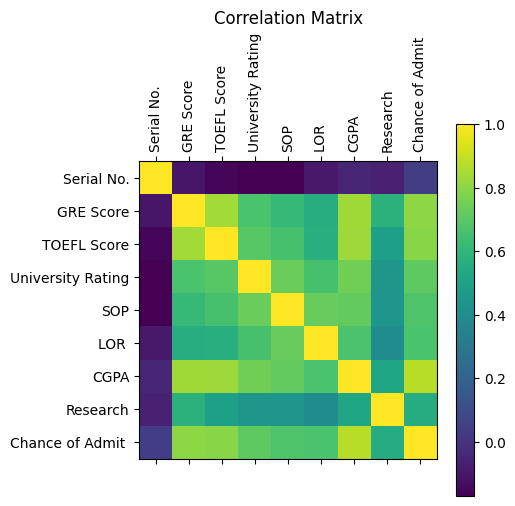

In [12]:
# Plot the correlation matrix
corr = data.corr()
plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns,rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

In [13]:
#dropping Serial No.
data.drop('Serial No.',axis=1)

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research   
0          337          118                  4  4.5   4.5  9.65         1  \
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
395        324          110                  3  3.5   3.5  9.04         1   
396        325          107                  3  3.0   3.5  9.11         1   
397        330          116                  4  5.0   4.5  9.45         1   
398        312          103                  3  3.5   4.0  8.78         0   
399        333          117                  4  5.0   4.0  9.66         1   

     Chance of Admit   
0                0.92  
1                0.76  
2                0.72  
3                0.80  
4                0.65  
..                ...  
395              0.82  
396              0.84  
397              0.91  
398              0.67  
399              0.95  

[400 rows x 8 columns]

# Train-test split

In [14]:
from sklearn.model_selection import train_test_split 

In [15]:
#storing independent variable in X
X = data.drop('Chance of Admit ',axis=1)

In [16]:
X.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA   
0           1        337          118                  4  4.5   4.5  9.65  \
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  
0         1  
1         1  
2         1  
3         1  
4         0

In [17]:
#storing response variable in Y
Y = data['Chance of Admit ']

In [18]:
Y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

# Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [21]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_train

array([[-1.76561509,  0.45711129,  0.42466178, ..., -1.05965163,
         0.13986648,  0.92761259],
       [-1.63287455,  0.1022887 ,  0.42466178, ..., -0.50194025,
         0.36110014, -1.07803625],
       [-0.00459061,  2.05381293,  2.08593034, ...,  1.17119391,
         2.25009529,  0.92761259],
       ...,
       [ 0.5971665 , -0.96217907, -0.40597251, ..., -0.50194025,
        -0.62594237,  0.92761259],
       [ 1.2874173 , -1.31700165, -1.40273364, ..., -1.61736302,
        -2.27668588, -1.07803625],
       [-0.88952753, -0.25253389, -0.23984565, ...,  0.05577114,
        -0.57488845, -1.07803625]])

# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lin_reg = LinearRegression()

lin_reg.fit(X_train, Y_train)

Y_pred = lin_reg.predict(X_test)
print("Coefficient : ",lin_reg.coef_)

print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred))

print('R2 score: %.2f' % r2_score(Y_test, Y_pred))

Coefficient :  [0.02043738 0.02207558 0.02136452 0.01239074 0.00198186 0.01485864
 0.05795908 0.01081316]
Mean Squared Error: 0.004616592264723968
R2 score: 0.82


# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

#Coverting continuous data to binary data!
data['Admitted'] = data['Chance of Admit '] > 0.7
data['Admitted'] = data['Admitted'].astype(int)

X2 = data.drop(['Chance of Admit ', 'Admitted'], axis=1)
Y2 = data['Admitted']
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

logreg = LogisticRegression()
logreg.fit(X2_train, Y2_train)

#predict
Y_pred_LGR = logreg.predict(X2_test)

accuracy_LGR = accuracy_score(Y2_test, Y_pred_LGR)
confusion_mat_LGR = confusion_matrix(Y2_test, Y_pred_LGR)
class_report = classification_report(Y2_test, Y_pred_LGR)

print("Coefficient : ",logreg.coef_)

print('Confusion Matrix:\n', confusion_mat_LGR)

Coefficient :  [[0.79713513 0.94818654 0.38504907 0.50498322 0.12803593 0.50401971
  0.8880036  0.5966132 ]]
Confusion Matrix:
 [[31  2]
 [ 6 41]]


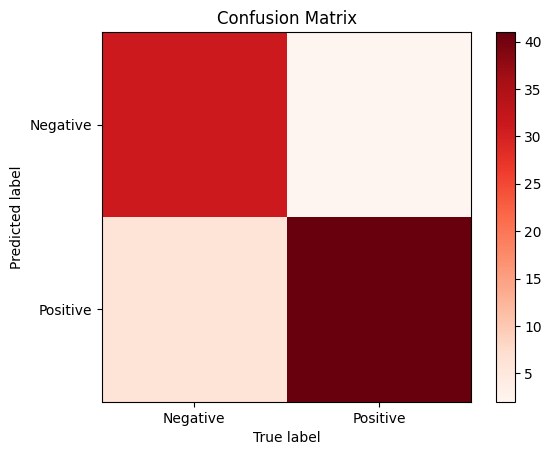

In [25]:
def plot_confusion_matrix(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
    plt.colorbar()
    plt.xticks([0, 1], ['Negative', 'Positive'])
    plt.yticks([0, 1], ['Negative', 'Positive'])
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()
plot_confusion_matrix(confusion_mat_LGR)

In [26]:
precision_LGR, recall_LGR, fscore_LGR, support_LGR = precision_recall_fscore_support(Y2_test, Y_pred_LGR,average='binary')
print('Accuracy:', accuracy_LGR)
print('Precision:', precision_LGR)
print('Recall:', recall_LGR)

Accuracy: 0.9
Precision: 0.9534883720930233
Recall: 0.8723404255319149


# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
# Defining the KNN model
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X2_train, Y2_train)

# Predicting on the test set
Y_pred_KNN = knn.predict(X2_test)

# Evaluating the model
accuracy_KNN = accuracy_score(Y2_test, Y_pred_KNN)
confusion_mat_KNN = confusion_matrix(Y2_test, Y_pred_KNN)
class_report = classification_report(Y2_test, Y_pred_KNN)
print(confusion_mat_KNN)

[[26  7]
 [ 6 41]]


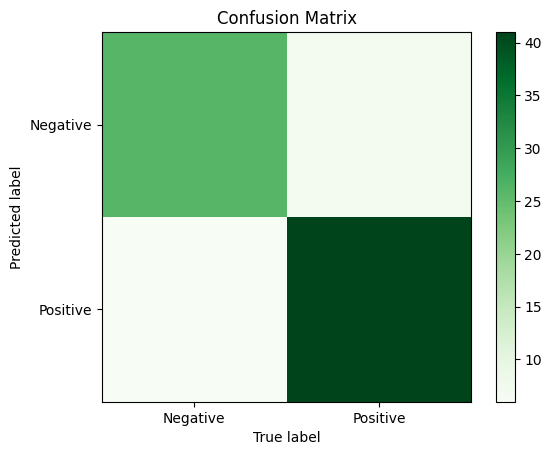

In [28]:
def plot_confusion_matrix(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
    plt.colorbar()
    plt.xticks([0, 1], ['Negative', 'Positive'])
    plt.yticks([0, 1], ['Negative', 'Positive'])
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()
plot_confusion_matrix(confusion_mat_KNN)

In [29]:
precision_KNN, recall_KNN, fscore_KNN, support_KNN = precision_recall_fscore_support(Y2_test, Y_pred_KNN,average='binary')
print('Accuracy:', accuracy_KNN)
print('Precision:', precision_KNN)
print('Recall:', recall_KNN)

Accuracy: 0.8375
Precision: 0.8541666666666666
Recall: 0.8723404255319149
